Ci dessous, nous créons une liste de toutes les issues possibles du jeu.

In [1]:
gains = []
for de1 in range(1,6+1) :
    for de2 in range(1,6+1) :
        gains.append(de1+de2)
print(gains)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


Ci dessous, nous créons une liste de toutes les issues différentes possibles de l'évènement. Nous comptons ensuite le nombre d'issues égales à l'issue k, que nous convertissons en fraction du total.

In [2]:
import numpy as np
omegax = list(range(2,12+1))
loi = []
for k in omegax:
    pk = gains.count(k) / len(gains)
    loi.append((k,pk))
print(loi)

[(2, 0.027777777777777776), (3, 0.05555555555555555), (4, 0.08333333333333333), (5, 0.1111111111111111), (6, 0.1388888888888889), (7, 0.16666666666666666), (8, 0.1388888888888889), (9, 0.1111111111111111), (10, 0.08333333333333333), (11, 0.05555555555555555), (12, 0.027777777777777776)]


Ci dessous, nous réutilisons la liste des probabilités des évènements différents. Nous les additionnons ensuite pour créer une moyenne des issues, ou une espérance de gains au jeu.

In [3]:
esperance = 0
for  (k,pk) in loi:
    esperance += k * pk
print(esperance)

6.999999999999999


Ci dessous, pour chaque issue et sa probabilité, on ajoute l'issue au carré multiplié par sa probabilité à un total, que nous soustrayions finalement par l'espérance au carré. Ce qui nous donne un taux de variance parmis les issues possibles.

In [4]:
variance = 0
for (k,pk) in loi:
    variance = variance + (k ** 2) * pk
variance = variance - esperance ** 2
print(variance)

5.833333333333336


In [5]:
import random

def simulation_experience():
    return random.choices([1, 2, 3, 4, 5, 6], k=10)

In [6]:
def fun_X(des):
    return sum(des)

In [7]:
def simulation_repetee(exp, X, nrep):
    return [X(exp()) for _ in range(nrep)]

In [8]:
import random
import numpy

In [9]:
def estimation_loi(valeurs_obtenues, valeurs_possibles):
  # Ensemble des valeurs différentes possibles
  # prises par la variable aléatoire
  omegax = valeurs_possibles
  # On calcule ensuite le nombre de fois où chaque
  # valeur de Omega_X apparait dans l'ensemble des valeurs 
  # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
  res = []
  for k in omegax :
      res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
  return res

In [10]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 1000)
loi = estimation_loi(valeurs_simulees, list(range(10,60+1)))
print(loi)

[(10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.002), (21, 0.004), (22, 0.002), (23, 0.008), (24, 0.012), (25, 0.018), (26, 0.016), (27, 0.027), (28, 0.031), (29, 0.031), (30, 0.051), (31, 0.05), (32, 0.055), (33, 0.071), (34, 0.086), (35, 0.057), (36, 0.074), (37, 0.073), (38, 0.073), (39, 0.051), (40, 0.051), (41, 0.046), (42, 0.032), (43, 0.021), (44, 0.02), (45, 0.01), (46, 0.008), (47, 0.008), (48, 0.006), (49, 0.003), (50, 0.002), (51, 0.0), (52, 0.001), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0)]


In [11]:
import matplotlib
import matplotlib.pyplot as plt

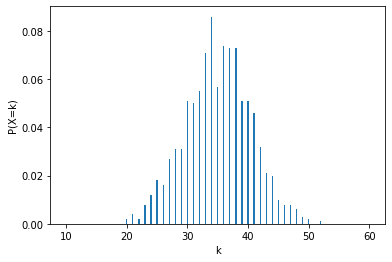

In [12]:
x = []
y = []
for (k,pk) in loi :
  x.append(k)
  y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

In [13]:
def estimation_loi(valeurs_obtenues, valeurs_possibles = None):
  # On détermine Omega_X
  if valeurs_possibles is None :
    omegax = numpy.unique(valeurs_obtenues)
  else :
    omegax = valeurs_possibles
  # On calcule ensuite le nombre de fois où chaque
  # valeur de Omega_X apparait dans l'ensemble des valeurs 
  # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
  res = []
  for k in omegax :
      res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
  return res

In [14]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 10000)
loi = estimation_loi(valeurs_simulees)
print(loi)

[(13, 0.0001), (16, 0.0001), (17, 0.0003), (18, 0.0002), (19, 0.0013), (20, 0.0012), (21, 0.0015), (22, 0.004), (23, 0.0052), (24, 0.0096), (25, 0.0142), (26, 0.0199), (27, 0.0257), (28, 0.0331), (29, 0.0396), (30, 0.048), (31, 0.0546), (32, 0.0605), (33, 0.0671), (34, 0.0698), (35, 0.076), (36, 0.0766), (37, 0.0695), (38, 0.0587), (39, 0.054), (40, 0.0495), (41, 0.0408), (42, 0.0323), (43, 0.0247), (44, 0.0205), (45, 0.0136), (46, 0.0119), (47, 0.0064), (48, 0.0035), (49, 0.0026), (50, 0.0017), (51, 0.0009), (52, 0.0005), (53, 0.0002), (54, 0.0001)]


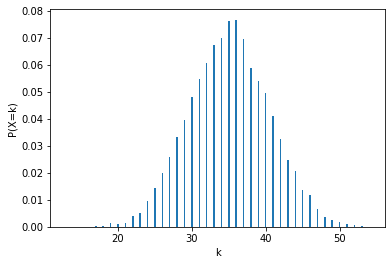

In [15]:
x = []
y = []
for (k,pk) in loi :
  x.append(k)
  y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

# Exercices

## 5000 simplifié

Issues possibles

In [16]:
def jet5des():
    return random.choices([1, 2, 3, 4, 5, 6], k=5)

convertion en valeurs

In [17]:
def valeurs(jet):
    val = 0
    for de in jet :
        if de == 5 :
            val+=50
        elif de == 1 :
            val+=100
    return val

définition d'un jeu

In [18]:
def jeu():
    des = jet5des()
    return valeurs(des)

Expériences répétées

In [19]:
def experience5000(nrep):
    return [valeurs(jet5des()) for _ in range(nrep)]

loi de probabilité

In [20]:
def estimation_loi(résultats, valeurs_possibles = None):
    # On détermine l'univers de X, ou les possibilités
    if valeurs_possibles is None :
        Possibilités = numpy.unique(résultats)
    else :
        Possibilités = valeurs_possibles
        # On calcule ensuite le nombre de fois où chaque
        # valeur de l'univers de X apparait dans l'ensemble des valeurs 
        # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for p in Possibilités :
        res.append((p, résultats.count(p) / len(résultats)))
    return res

Espérance

In [21]:
def Esperance(loi) :
    e = 0
    for (k,pk) in loi:
        e += k * pk
    return e

Variance

In [22]:
def Variance(loi) :
    v = 0
    for (k,pk) in loi:
        v = v + (k ** 2) * pk
    v = v - esperance ** 2
    return v

Mise en forme

In [23]:
def cinqmille(nbrep):
    résultats = experience5000(nbrep)
    loi = estimation_loi(résultats)
    Esp = Esperance(loi)
    Var = Variance(loi)
    retour = {
        'loi' : loi,
        'E' : Esp,
        'V' : Var
    }
    return retour

In [24]:
print(cinqmille(1000))

{'loi': [(0, 0.158), (50, 0.159), (100, 0.245), (150, 0.201), (200, 0.126), (250, 0.062), (300, 0.035), (350, 0.01), (400, 0.002), (450, 0.002)], 'E': 119.00000000000001, 'V': 21336.0}


## Sanction pifométrique

Issues possibles

In [25]:
def sanctions():
    return np.random.choice(['gentil', 'méchant'], 13, p=[0.10,0.90])

convertion en correct

In [66]:
def correct(sanction):
    c = 0
    for s in sanction :
        if s == 'gentil' :
            c += 1
    return c

définition d'un expérience

In [57]:
def expérience():
    s = sanctions()
    return correct(s)

Expériences répétées

In [58]:
def répétitions(nrep):
    return [correct(sanctions()) for _ in range(nrep)]

loi de probabilité

In [59]:
def estimation_loi(résultats, valeurs_possibles = None):
    # On détermine l'univers de X, ou les possibilités
    if valeurs_possibles is None :
        Possibilités = numpy.unique(résultats)
    else :
        Possibilités = valeurs_possibles
        # On calcule ensuite le nombre de fois où chaque
        # valeur de l'univers de X apparait dans l'ensemble des valeurs 
        # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for p in Possibilités :
        res.append((p, résultats.count(p) / len(résultats)))
    return res

Espérance

In [68]:
def Esperance(loi) :
    e = 0
    for (k,pk) in loi:
        e += k * pk
    return e

Variance

In [73]:
def Variance(loi, esp) :
    v = 0
    for (k,pk) in loi:
        v = v + (k ** 2) * pk
    v = v - esp ** 2
    return v

Mise en forme

In [74]:
def pifométrique(nbrep):
    résultats = répétitions(nbrep)
    loi = estimation_loi(résultats, list(range(0,13+1)))
    Esp = Esperance(loi)
    Var = Variance(loi, Esp)
    retour = {
        'loi' : loi,
        'E' : Esp,
        'V' : Var
    }
    return retour

In [75]:
print(pifométrique(10000))

{'loi': [(0, 0.2551), (1, 0.3686), (2, 0.2416), (3, 0.102), (4, 0.0262), (5, 0.0055), (6, 0.001), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0)], 'E': 1.2961, 'V': 1.1658247900000003}
